In [1]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
from mpl_toolkits.basemap import Basemap #to render maps
import math
import json #to write dict with parameters

import GrowYourIC
from GrowYourIC import positions, geodyn, geodyn_trg, geodyn_static, plot_data, data

plt.rcParams['figure.figsize'] = (8.0, 3.0) #size of figures
cm = plt.cm.get_cmap('viridis')
cm2 = plt.cm.get_cmap('winter')

In [6]:
age_ic_dim = 1e9 #in years
rICB_dim = 1221. #in km

translation_velocity_dim = 4.e-10
time_translation = rICB_dim*1e3/translation_velocity_dim /(np.pi*1e7)
maxAge = 2.*time_translation/1e6

units = None #we give them already dimensionless parameters. 
rICB = 1.
age_ic = 1.
omega = 0.
omega_2_dim = 0.45 #degree/Myears
omega_2 = omega_2_dim*np.pi/180*age_ic_dim*1e-6

velocity_amplitude = translation_velocity_dim*age_ic_dim*np.pi*1e7/rICB_dim/1e3
velocity_center = [0., 100.]#center of the eastern hemisphere
center = [0,-80] #center of the western hemisphere
velocity = geodyn_trg.translation_velocity(velocity_center, velocity_amplitude)
exponent_growth = 0.1

proxy_type = "age"#"growth rate"
proxy_name = "age (Myears)" #growth rate (km/Myears)"
proxy_lim = [0, maxAge] #or None

print("=== Model 1 ===")
print("The translation recycles the inner core material in {0:.2e} million years.".format(maxAge))
print("Translation velocity is {0:.2e} km/years, {1:.2}.".format(translation_velocity_dim*np.pi*1e7/1e3, velocity_amplitude))
print("Rotation rate is {0:.2e} degree per Myears, {1:.2e}.".format(omega, omega))
print("===")


geodynModel = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity,
              'exponent_growth': exponent_growth,
              'omega': omega,
              'proxy_type': proxy_type})
geodynModel.set_parameters(parameters)
geodynModel.define_units()

print("=== Model 2 ===")
print("The translation recycles the inner core material in {0:.2e} million years.".format(maxAge))
print("Translation velocity is {0:.2e} km/years, {1:.2}.".format(translation_velocity_dim*np.pi*1e7/1e3, velocity_amplitude))
print("Rotation rate is {0:.2e} degree per Myears, {1:.2e}.".format(omega_2_dim, omega_2))
print("===")


geodynModel2 = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters2 = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity,
              'exponent_growth': exponent_growth,
              'omega': omega_2,
              'proxy_type': proxy_type})
geodynModel2.set_parameters(parameters2)
geodynModel2.define_units()


=== Model 1 ===
The translation recycles the inner core material in 1.94e+02 million years.
Translation velocity is 1.26e-05 km/years, 1e+01.
Rotation rate is 0.00e+00 degree per Myears, 0.00e+00.
===
=== Model 2 ===
The translation recycles the inner core material in 1.94e+02 million years.
Translation velocity is 1.26e-05 km/years, 1e+01.
Rotation rate is 4.50e-01 degree per Myears, 7.85e+00.
===


In [3]:
## real data set - WD13
data_set = data.SeismicFromFile("../GrowYourIC/data/WD11.dat")
data_set.method = "bt_point"
proxy1 = geodyn.evaluate_proxy(data_set, geodynModel, proxy_type=proxy_type, verbose=False)
#proxy2 = geodyn.evaluate_proxy(data_set, geodynModel2, proxy_type=proxy_type, verbose=False)

# random data set -
data_set_random = data.RandomData(3000)
data_set_random.method = "bt_point"
proxy_random1 = geodyn.evaluate_proxy(data_set_random, geodynModel, proxy_type=proxy_type, verbose=False)
#proxy_random2 = geodyn.evaluate_proxy(data_set_random, geodynModel2, proxy_type=proxy_type, verbose=False)


# perfect repartition in depth (for meshgrid plots)
data_meshgrid = data.Equator_upperpart(150,150)
data_meshgrid.method = "bt_point"
proxy_meshgrid = geodyn.evaluate_proxy(data_meshgrid, geodynModel, proxy_type=proxy_type, verbose = False)
proxy_meshgrid2 = geodyn.evaluate_proxy(data_meshgrid, geodynModel2, proxy_type=proxy_type, verbose = False)

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Data set from Waszek and Deuss 2011
= Proxy is evaluated for bt_point
= Number of points to examine: 3184


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Random repartition of data, between 0 and 100km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 3000
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Meshgrid at the equator between 0 and 120km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 22500
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Meshgrid at the equator between 0 and 120km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 22500
===


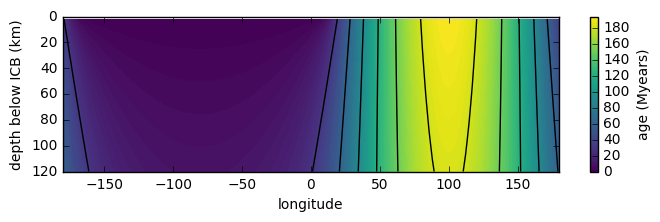

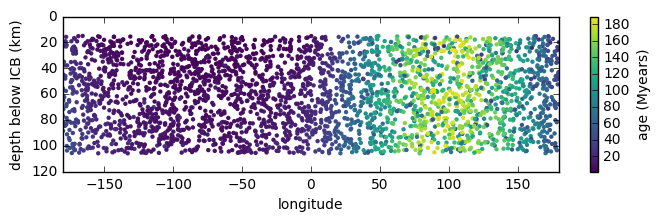

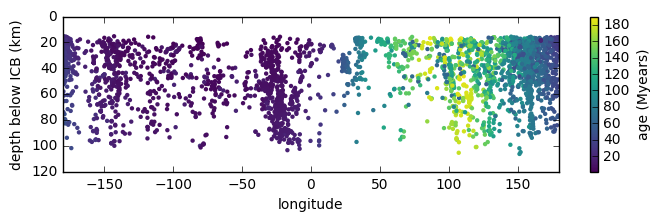

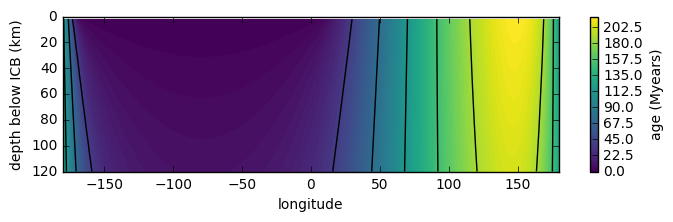

In [5]:
fig3, ax3 = plt.subplots(figsize=(8, 2))
X, Y, Z  = data_meshgrid.mesh_RPProxy(proxy_meshgrid)
sc = ax3.contourf(Y, rICB_dim*(1.-X), Z, 100, cmap=cm)
sc2 = ax3.contour(sc, levels=sc.levels[::15], colors = "k")
ax3.set_ylim(-0, 120)
fig3.gca().invert_yaxis()
ax3.set_xlim(-180,180)
cbar = fig3.colorbar(sc)
#cbar.set_clim(0, maxAge)
cbar.set_label(proxy_name)
ax3.set_xlabel("longitude")
ax3.set_ylabel("depth below ICB (km)")

r, t, p = data_set_random.extract_rtp("bottom_turning_point")
fig, ax = plt.subplots(figsize=(8, 2))
sc=ax.scatter(p,rICB_dim*(1.-r), c=proxy_random1, s=10,cmap=cm, linewidth=0)
ax.set_ylim(-0,120)
fig.gca().invert_yaxis()
ax.set_xlim(-180,180)
cbar = fig.colorbar(sc)
if proxy_lim is not None:
    cbar.set_clim(0, maxAge)
ax.set_xlabel("longitude")
ax.set_ylabel("depth below ICB (km)")
cbar.set_label(proxy_name)

r, t, p = data_set.extract_rtp("bottom_turning_point")
fig, ax = plt.subplots(figsize=(8, 2))
sc=ax.scatter(p,rICB_dim*(1.-r), c=proxy1, s=10,cmap=cm, linewidth=0)
ax.set_ylim(-0,120)
fig.gca().invert_yaxis()
ax.set_xlim(-180,180)
cbar = fig.colorbar(sc)
if proxy_lim is not None:
    cbar.set_clim(0, maxAge)
ax.set_xlabel("longitude")
ax.set_ylabel("depth below ICB (km)")
cbar.set_label(proxy_name)

fig3, ax3 = plt.subplots(figsize=(8, 2))
X, Y, Z  = data_meshgrid.mesh_RPProxy(proxy_meshgrid2)
sc = ax3.contourf(Y, rICB_dim*(1.-X), Z, 100, cmap=cm)
sc2 = ax3.contour(sc, levels=sc.levels[::15], colors = "k")
ax3.set_ylim(-0, 120)
fig3.gca().invert_yaxis()
ax3.set_xlim(-180,180)
cbar = fig3.colorbar(sc)
#cbar.set_clim(0, maxAge)
cbar.set_label(proxy_name)
ax3.set_xlabel("longitude")
ax3.set_ylabel("depth below ICB (km)")
